In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [9]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


#Normalize
divided by 255 to normalize images ranges[0,1]

In [10]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [11]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#Training and Testing

In [13]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 72s 93ms/step - loss: 0.6508 - accuracy: 0.6108 - val_loss: 0.6165 - val_accuracy: 0.6658
Epoch 2/10
625/625 [==============================] - 55s 88ms/step - loss: 0.5185 - accuracy: 0.7419 - val_loss: 0.5233 - val_accuracy: 0.7518
Epoch 3/10
625/625 [==============================] - 73s 117ms/step - loss: 0.3576 - accuracy: 0.8372 - val_loss: 0.6876 - val_accuracy: 0.7594
Epoch 4/10
625/625 [==============================] - 57s 91ms/step - loss: 0.1832 - accuracy: 0.9244 - val_loss: 1.0333 - val_accuracy: 0.7452
Epoch 5/10
625/625 [==============================] - 57s 91ms/step - loss: 0.0884 - accuracy: 0.9682 - val_loss: 1.1870 - val_accuracy: 0.7248
Epoch 6/10
625/625 [==============================] - 54s 86ms/step - loss: 0.0592 - accuracy: 0.9790 - val_loss: 1.2790 - val_accuracy: 0.7524
Epoch 7/10
625/625 [==============================] - 57s 91ms/step - loss: 0.0532 - accuracy: 0.9841 - val_loss: 1.3428 - val_accuracy

#Graphical Analysis

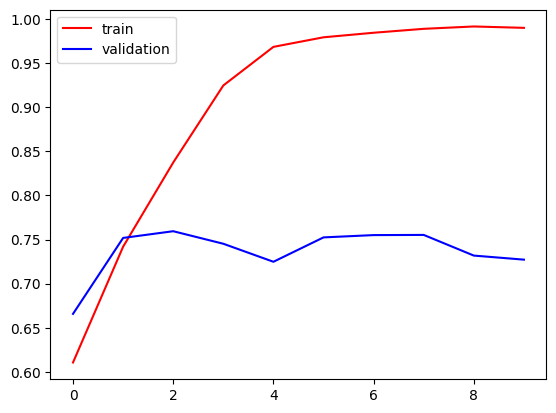

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

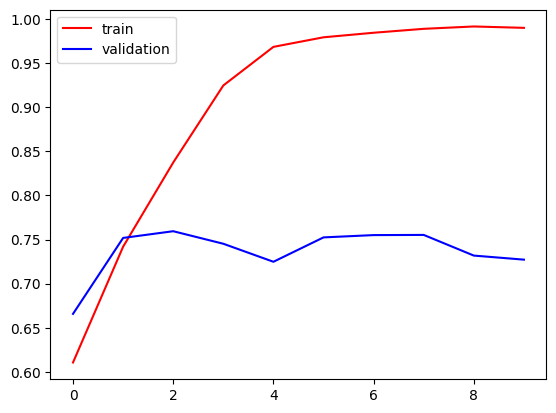

In [15]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

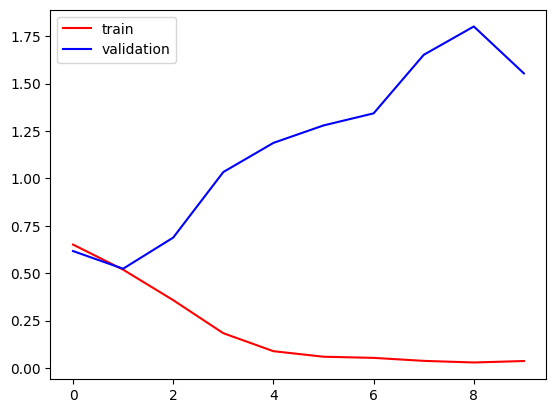

In [16]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

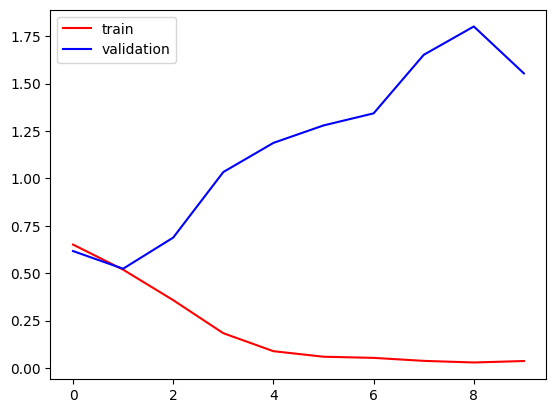

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

##Reduce Overfitting Techniques used
                                    **Batch Normalization**
                                        ** DropOut**

In [18]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

#Training and Testing(Again)

In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 72s 109ms/step - loss: 1.2093 - accuracy: 0.6192 - val_loss: 0.6268 - val_accuracy: 0.6474
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5522 - accuracy: 0.7163 - val_loss: 0.6765 - val_accuracy: 0.6150
Epoch 3/10
625/625 [==============================] - 69s 110ms/step - loss: 0.4923 - accuracy: 0.7657 - val_loss: 0.4937 - val_accuracy: 0.7624
Epoch 4/10
625/625 [==============================] - 66s 106ms/step - loss: 0.4085 - accuracy: 0.8136 - val_loss: 0.4543 - val_accuracy: 0.7970
Epoch 5/10
625/625 [==============================] - 69s 109ms/step - loss: 0.3454 - accuracy: 0.8483 - val_loss: 0.4952 - val_accuracy: 0.7912
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2658 - accuracy: 0.8855 - val_loss: 1.4094 - val_accuracy: 0.6262
Epoch 7/10
625/625 [==============================] - 68s 109ms/step - loss: 0.1837 - accuracy: 0.9259 - val_loss: 0.5669 - val_ac

# Graphical Analysis

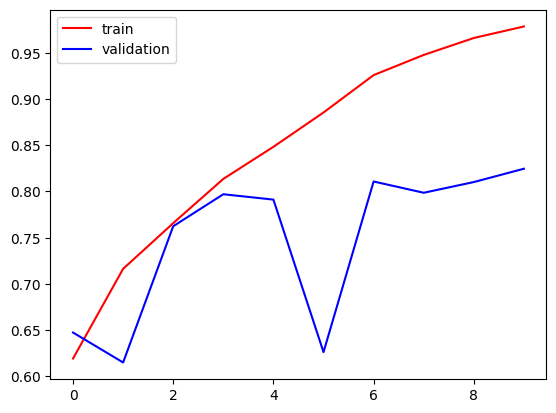

In [21]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

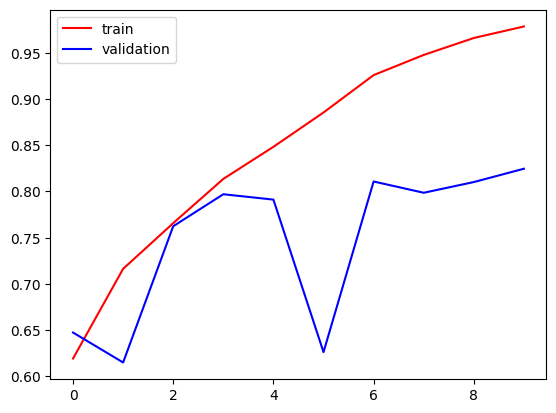

In [22]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

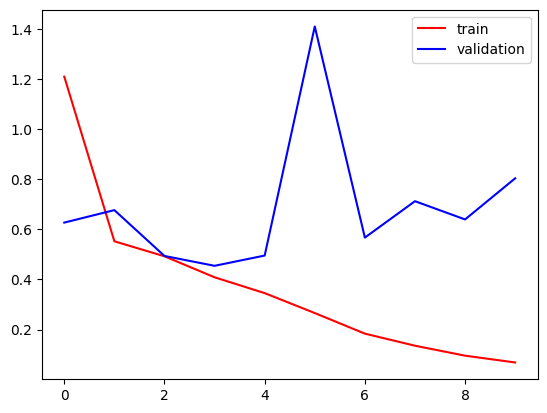

In [23]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

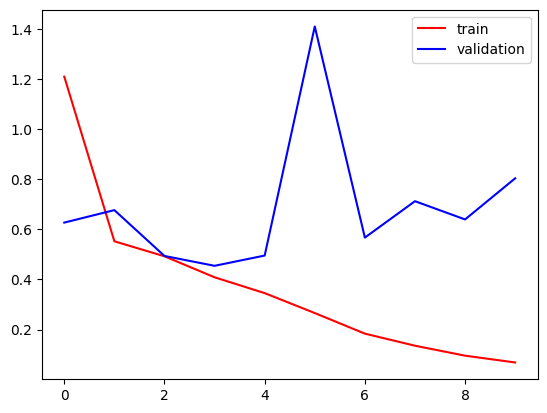

In [24]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [25]:
import cv2

#Image importing for classification

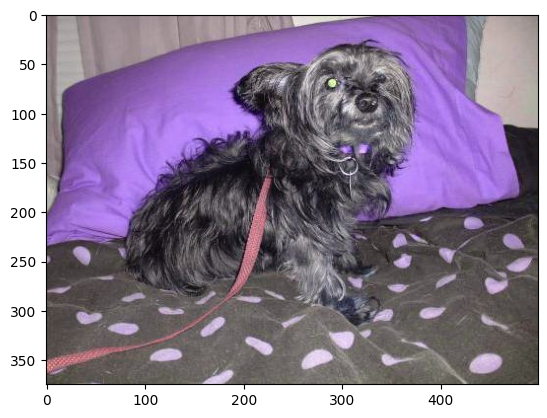

In [31]:
test_img = cv2.imread('/content/dog.jpg')
plt.imshow(test_img)

In [32]:
test_img.shape

(375, 499, 3)

In [33]:
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))

In [34]:
mod = model.predict(test_input)

1/1 [==============================] - 0s 17ms/step


In [35]:
if mod == 0:
  print("Model Predicted image as Cat")
else:
  print("Model Predicted image as Dog")

Model Predicted image as Dog
